<a href="https://colab.research.google.com/github/JLucas17/TRABALHO-3-DE-TOPICOS-DE-BIG-DATA-EM-PYTHON/blob/main/KNN_K_NEAREST_NEIGHBORS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementação do algoritmo KNN K-Nearest Neighbors para prever a faixa de renda de estudantes:

In [ ]:
# Prevendo faixa de renda de estudantes com Machine Learning (KNN)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para criar nosso modelo de ML

from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Biblioteca para plotar nosso modelo

from mlxtend.plotting import plot_decision_regions

In [ ]:
# pip install pandas

In [ ]:
# Lendo o arquivo csv

df = pd.read_csv('Data.csv')
df.drop(['sl_no'], 1, inplace = True)

<ipython-input-4-94cc67b04166>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(['sl_no'], 1, inplace = True)


In [ ]:
# Printando as primeiras linhas

df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Vendo algumas informações com .info() e .describe()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [ ]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [ ]:
# Incluindo dados categóricos (object) no .describe()

df.describe(include=['object'])

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
count,215,215,215,215,215,215,215,215
unique,2,2,2,3,3,2,2,2
top,M,Central,Others,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed
freq,139,116,131,113,145,141,120,148


In [ ]:
# Tratamento dos dados

df = df[df['degree_t'] != 'Others']

In [ ]:
# Inserindo 0 para os salários faltantes

df['salary'].fillna(0, inplace = True)

In [ ]:
df['salary'].describe()

count       204.000000
mean     202544.117647
std      154464.984840
min           0.000000
25%           0.000000
50%      240000.000000
75%      285500.000000
max      940000.000000
Name: salary, dtype: float64

In [ ]:
# A mediana é 240.000. Agora resta dividir os grupos

df.loc[df['salary'] < 240000, 'salary'] = 0
df.loc[df['salary'] >= 240000, 'salary'] = 1

In [ ]:
# Para checar, veja os valores únicos da coluna "salary" com o método .unique()

df['salary'].unique()

array([1., 0.])

In [ ]:
#  tratar os dados categóricos com a função do pandas pd.get_dummies() para criar novas colunas para cada tipo de valor que temos em uma determinada coluna.

df_dummy = pd.get_dummies(df)

In [ ]:
df_dummy.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,...,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1.0,0,1,0,1,...,1,0,0,1,1,0,0,1,0,1
1,79.33,78.33,77.48,86.5,66.28,0.0,0,1,1,0,...,0,1,0,1,0,1,1,0,0,1
2,65.00,68.00,64.00,75.0,57.80,1.0,0,1,1,0,...,0,0,1,0,1,0,1,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,...,0,1,0,1,1,0,0,1,1,0
4,85.80,73.60,73.30,96.8,55.50,1.0,0,1,1,0,...,1,0,1,0,1,0,1,0,0,1


<ipython-input-16-96a164d23c1c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)


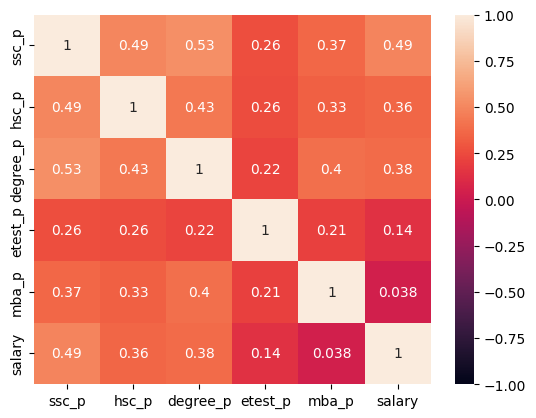

In [ ]:
# Matriz de correlação

sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

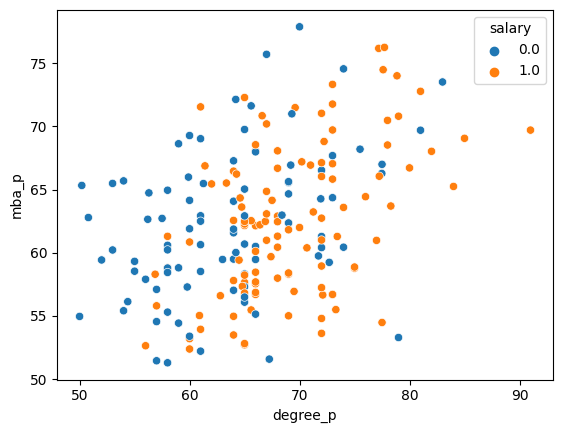

In [ ]:
# Análise gráfica

sns.scatterplot(data=df, x='degree_p', y='mba_p', hue='salary')
plt.show()

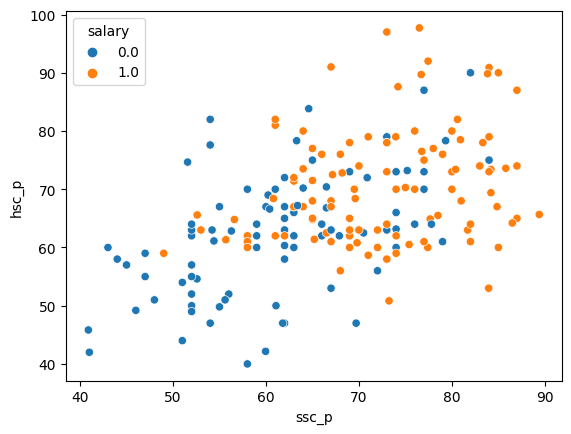

In [ ]:
sns.scatterplot(data=df, x='ssc_p', y='hsc_p', hue='salary')
plt.show()

Aplicando modelo de Machine Learning: KNN

In [ ]:
# Definindo colunas de features (X) e targets (y)

# Colunas dos "features"

X = np.array(df_dummy.drop(['salary'], 1))

# Colunas do "target"

y = np.array(df_dummy['salary'])

<ipython-input-19-f5c348522496>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_dummy.drop(['salary'], 1))


In [ ]:
# Separando o Dataset em treino e teste

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=0)

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# Definindo nosso modelo (KNN)

clf = neighbors.KNeighborsClassifier(n_neighbors=19, metric='euclidean')

In [ ]:
# Treinando nosso modelo

clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=19)

In [ ]:
# Testando sua acurácia no dataset de teste

accuracy = clf.score(X_test, y_test)
accuracy

0.926829268292683

In [ ]:
# Vamos visualizar usando as duas variáveis com a fronteira mais 'evidente'. Mas elas não são as únicas que influenciam!

def knn_comparison(data, k):
    x = data[['ssc_p','hsc_p']].values
    y = data['salary'].astype(int).values
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    plot_decision_regions(x, y, clf=knn)
    plt.xlabel('ssc_p')
    plt.ylabel('hsc_p')
    plt.title('K='+ str(k))
    plt.show()

In [ ]:
df_dummy.head(1).T

,0
ssc_p,67.0
hsc_p,91.0
degree_p,58.0
etest_p,55.0
mba_p,58.8
salary,1.0
gender_F,0.0
gender_M,1.0
ssc_b_Central,0.0
ssc_b_Others,1.0


In [ ]:
exemplo = np.array([45,45,60,60,50,1,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0])

exemplo = exemplo.reshape(1,-1)

exemplo = sc_X.transform(exemplo)

predicao = clf.predict(exemplo)

print(predicao)

[0.]
